# Y E A S T

### 'fine replicates' and their consistency 

In [1]:
import pandas as pd
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt
from scipy.stats import entropy
import matplotlib as m
from sklearn.feature_selection import f_regression, mutual_info_regression

plt.rcParams["figure.dpi"] = 300

In [2]:
# basic bayexpress functions

# calculating Bayes factors
def get_BF(N_1, n_1, N_2, n_2):

    return (sc.betaln( u_1 + n_1, u_2 + N_1 - n_1) + sc.betaln( u_1 + n_2, u_2 + N_2 - n_2) - sc.betaln( u_1 + n_1 + n_2, u_2 + N_1 - n_1 + N_2 - n_2)) / np.log(10) 

# ratio of expression 
# calculating log fold change
def get_FC(N_1, n_1, N_2, n_2):
    rate_1 = (u_1 + n_1) / (u_2 + N_1 - n_1)
    rate_2 = (u_1 + n_2) / (u_2 + N_2 - n_2)

    return np.log2(rate_2 / rate_1)

# calculating q (following Laplace's rule of succession)
def get_q(n, N):
    return (n+1)/(N+2)

# setting the priors to flat prios
u_1 = 1
u_2 = 1


# calculating Bayes factors for consistency checks

def get_nBF(data):
    # this range is irrelevant if we want to do all 
    k = len(data.columns)

    evidence2 = np.full(len(data), 0)

    # iterating over j until k
    for col in data.columns[1:k]: 
        n_j = data[col]
        # print(n_j, 'n_j')
        N_j = sum(data[col])
        # print(N_j, 'N_j')
        evidence2 = evidence2 + sc.betaln(u_1 + n_j, u_2 + N_j - n_j)

    N = sum(data.iloc[:,1:k].sum(axis=0, numeric_only=True))
    n_i = data.iloc[:,1:k].sum(axis=1, numeric_only=True)

    # print(n_i, 'n_i')
    # print(N, 'N')

    evidence1 = sc.betaln( u_1 + n_i, u_2 + N - n_i)

    return (evidence2 - evidence1) / np.log(10) 


In [3]:
# exploring 'cumulative' BF

def get_cumu_BF(data):
    out_data = pd.DataFrame({})
    for k in range(3,len(data.columns)+1):

        evidence2 = np.full(len(data), 0)

        # iterating over j until k
        for col in data.columns[1:k]: 
            n_j = data[col]
            # print(n_j, 'n_j')
            N_j = sum(data[col])
            # print(N_j, 'N_j')
            evidence2 = evidence2 + sc.betaln(u_1 + n_j, u_2 + N_j - n_j)

        N = sum(data.iloc[:,1:k].sum(axis=0, numeric_only=True))
        n_i = data.iloc[:,1:k].sum(axis=1, numeric_only=True)

        # print(n_i, 'n_i')
        # print(N, 'N')

        evidence1 = sc.betaln( u_1 + n_i, u_2 + N - n_i)
        
        out_data[f'{k-1}'] = (evidence2 - evidence1) / np.log(10) 

    return out_data


### CONSISTENCY TESTS

In [4]:
WT_yeast = pd.read_csv('WT_yeast.csv', index_col=0)
Snf2_yeast = pd.read_csv('Snf2_yeast.csv', index_col=0)

display(WT_yeast)
display(Snf2_yeast)

,genes,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,15S_rRNA,2,12,31,8,21,11,2,3,7,...,0,49,9,4,11,12,1,22,12,4
1,21S_rRNA,20,76,101,99,128,74,36,32,57,...,10,274,49,30,72,58,21,159,107,70
2,HRA1,3,2,2,2,3,5,4,0,4,...,5,3,6,5,2,2,2,5,2,1
3,ICR1,75,123,107,157,98,245,119,120,119,...,85,177,137,118,113,81,142,94,187,106
4,LSR1,60,163,233,163,193,375,194,84,211,...,66,385,232,149,114,81,109,132,243,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7122,tY(GUA)M1,0,0,1,1,1,1,0,0,1,...,0,1,1,0,1,0,0,0,1,0
7123,tY(GUA)M2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7124,tY(GUA)O,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


,genes,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,15S_rRNA,4,2,5,5,46,5,4,2,40,...,7,15,6,1,85,8,34,3,6,3
1,21S_rRNA,31,18,23,44,356,35,33,13,148,...,64,79,67,13,576,52,234,23,44,24
2,HRA1,5,1,3,1,2,1,4,4,0,...,5,5,0,2,0,1,2,2,0,1
3,ICR1,205,196,211,252,127,275,160,190,146,...,286,155,184,164,202,186,148,183,195,145
4,LSR1,210,103,159,260,298,303,96,132,263,...,250,195,153,57,742,227,227,117,224,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,2,1,1
7122,tY(GUA)M1,0,0,1,0,2,0,0,0,0,...,1,1,1,0,0,0,0,0,0,1
7123,tY(GUA)M2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7124,tY(GUA)O,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [5]:
# calculating 'cumulatative' nBF

WT_cumu = get_cumu_BF(WT_yeast)

display(WT_cumu)

Snf2_cumu = get_cumu_BF(Snf2_yeast)


display(Snf2_cumu)

,2,3,4,5,6,7,8,9,10,11,...,33,34,35,36,37,38,39,40,41,42
0,-4.824123,-4.912829,-8.839685,-14.117564,-17.996641,-21.086076,-24.943705,-30.693142,-36.473404,-36.748828,...,-78.392957,-79.236264,-83.873072,-87.899103,-93.755645,-99.564530,-98.737339,-102.165373,-107.111094,-111.028167
1,-0.963656,0.632576,-4.889390,-5.707717,-1.756501,-1.034256,1.474677,-3.694451,-4.328017,30.503034,...,314.603331,332.522436,337.316054,341.359343,335.890120,333.215257,356.876602,375.089399,370.679089,365.965229
2,-5.943931,-12.083265,-18.278537,-24.465218,-30.802653,-36.940374,-42.530537,-48.629171,-54.649860,-60.521649,...,-192.140921,-198.484739,-204.355581,-210.085429,-216.320230,-222.587706,-228.790003,-234.076721,-240.250222,-246.380070
3,-4.823112,-9.807353,-15.238338,-19.905392,-24.625241,-29.785183,-34.360645,-39.709611,-44.590227,-49.889550,...,-155.375929,-160.782614,-166.296698,-171.236715,-175.771447,-179.030847,-184.072077,-188.751188,-193.899154,-199.310861
4,0.108211,10.803119,9.032746,4.700363,1.487643,-3.873543,11.533645,7.137768,1.803757,6.654632,...,249.996802,253.183338,247.773924,242.971550,239.948338,250.582110,269.366427,264.188637,259.247720,257.043307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,-6.286567,-12.763830,-19.421876,-26.124338,-32.363821,-39.044382,-45.782284,-52.528131,-59.264657,-65.422555,...,-215.130801,-222.115884,-229.041179,-235.853189,-242.628019,-249.481368,-256.468048,-263.178684,-270.184691,-277.038617
7122,-6.531056,-12.675472,-19.165382,-25.559965,-32.208462,-38.822300,-45.496440,-51.930123,-58.585525,-65.225674,...,-209.970841,-216.538875,-223.000753,-229.707786,-235.891374,-242.622613,-249.440170,-256.071351,-262.651404,-269.387754
7123,-6.531056,-12.675472,-19.333519,-26.035980,-32.922786,-39.191373,-45.993039,-52.789226,-59.566314,-66.302507,...,-215.904536,-222.907910,-229.847933,-236.670440,-243.454560,-250.319009,-257.321064,-264.038923,-271.060168,-277.923892
7124,-6.531056,-13.174062,-20.012232,-26.815334,-33.841214,-39.875493,-46.740922,-53.587450,-60.405100,-67.173308,...,-217.027288,-224.048953,-230.003826,-236.826334,-243.610453,-250.474902,-257.476958,-264.194816,-271.216061,-277.030310


,2,3,4,5,6,7,8,9,10,11,...,35,36,37,38,39,40,41,42,43,44
0,-6.103991,-12.057457,-18.248233,-0.689254,-4.779452,-10.148008,-14.380417,-8.405656,-13.822875,-19.135557,...,58.990171,53.171198,50.286105,48.540940,67.204146,63.100998,59.969102,58.492922,55.074698,52.273279
1,-5.373082,-11.152096,-15.709169,164.012305,176.098447,175.473667,187.389002,199.129378,194.351127,194.767768,...,804.627349,799.728536,799.019121,811.207678,1011.496083,1014.180313,1037.861715,1054.538366,1059.645076,1068.603540
2,-5.776665,-11.988302,-18.045738,-24.279166,-30.448821,-36.302987,-42.457222,-48.388459,-54.694911,-60.979764,...,-209.316343,-214.850561,-220.739455,-226.997613,-232.939793,-239.278730,-245.600999,-251.971431,-257.999634,-264.347894
3,-4.971297,-9.804811,-14.992280,-19.330740,-24.753763,-29.744215,-34.505353,-38.882697,-44.050455,-49.311961,...,-155.746721,-161.075340,-166.370178,-170.515722,-175.754308,-181.035691,-186.357233,-191.677668,-196.533408,-201.913097
4,-0.576562,-5.754128,-6.633886,15.230201,10.031782,15.283111,17.306187,20.515392,18.416235,13.685228,...,321.437539,316.081994,316.897201,329.751911,485.680806,480.472207,476.587686,482.279438,477.098099,473.797677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,-6.404911,-13.017210,-19.762178,-26.456642,-33.341253,-39.530966,-46.347490,-53.129063,-59.979981,-66.750607,...,-230.114841,-236.079392,-242.999319,-249.784977,-256.694193,-263.577612,-270.417138,-275.356707,-281.477286,-287.490152
7122,-6.672068,-12.950527,-19.695495,-25.231652,-31.904670,-38.586324,-45.341319,-52.078137,-58.880708,-65.618429,...,-222.528536,-228.875641,-235.353807,-242.033736,-248.799687,-255.553666,-262.281139,-269.041926,-275.805506,-282.046301
7123,-6.672068,-13.449795,-20.336202,-27.102349,-34.092758,-40.946441,-47.886024,-54.757106,-61.704721,-67.404270,...,-229.953348,-236.815191,-243.748169,-250.542638,-257.463792,-264.357998,-271.206862,-278.100616,-284.993383,-291.816655
7124,-6.334297,-12.946597,-19.691564,-26.386028,-33.270640,-40.066980,-46.945034,-53.063258,-59.914177,-66.684802,...,-228.743133,-234.775721,-241.682596,-248.459444,-255.356721,-262.229353,-269.059542,-275.932839,-282.805731,-289.612759


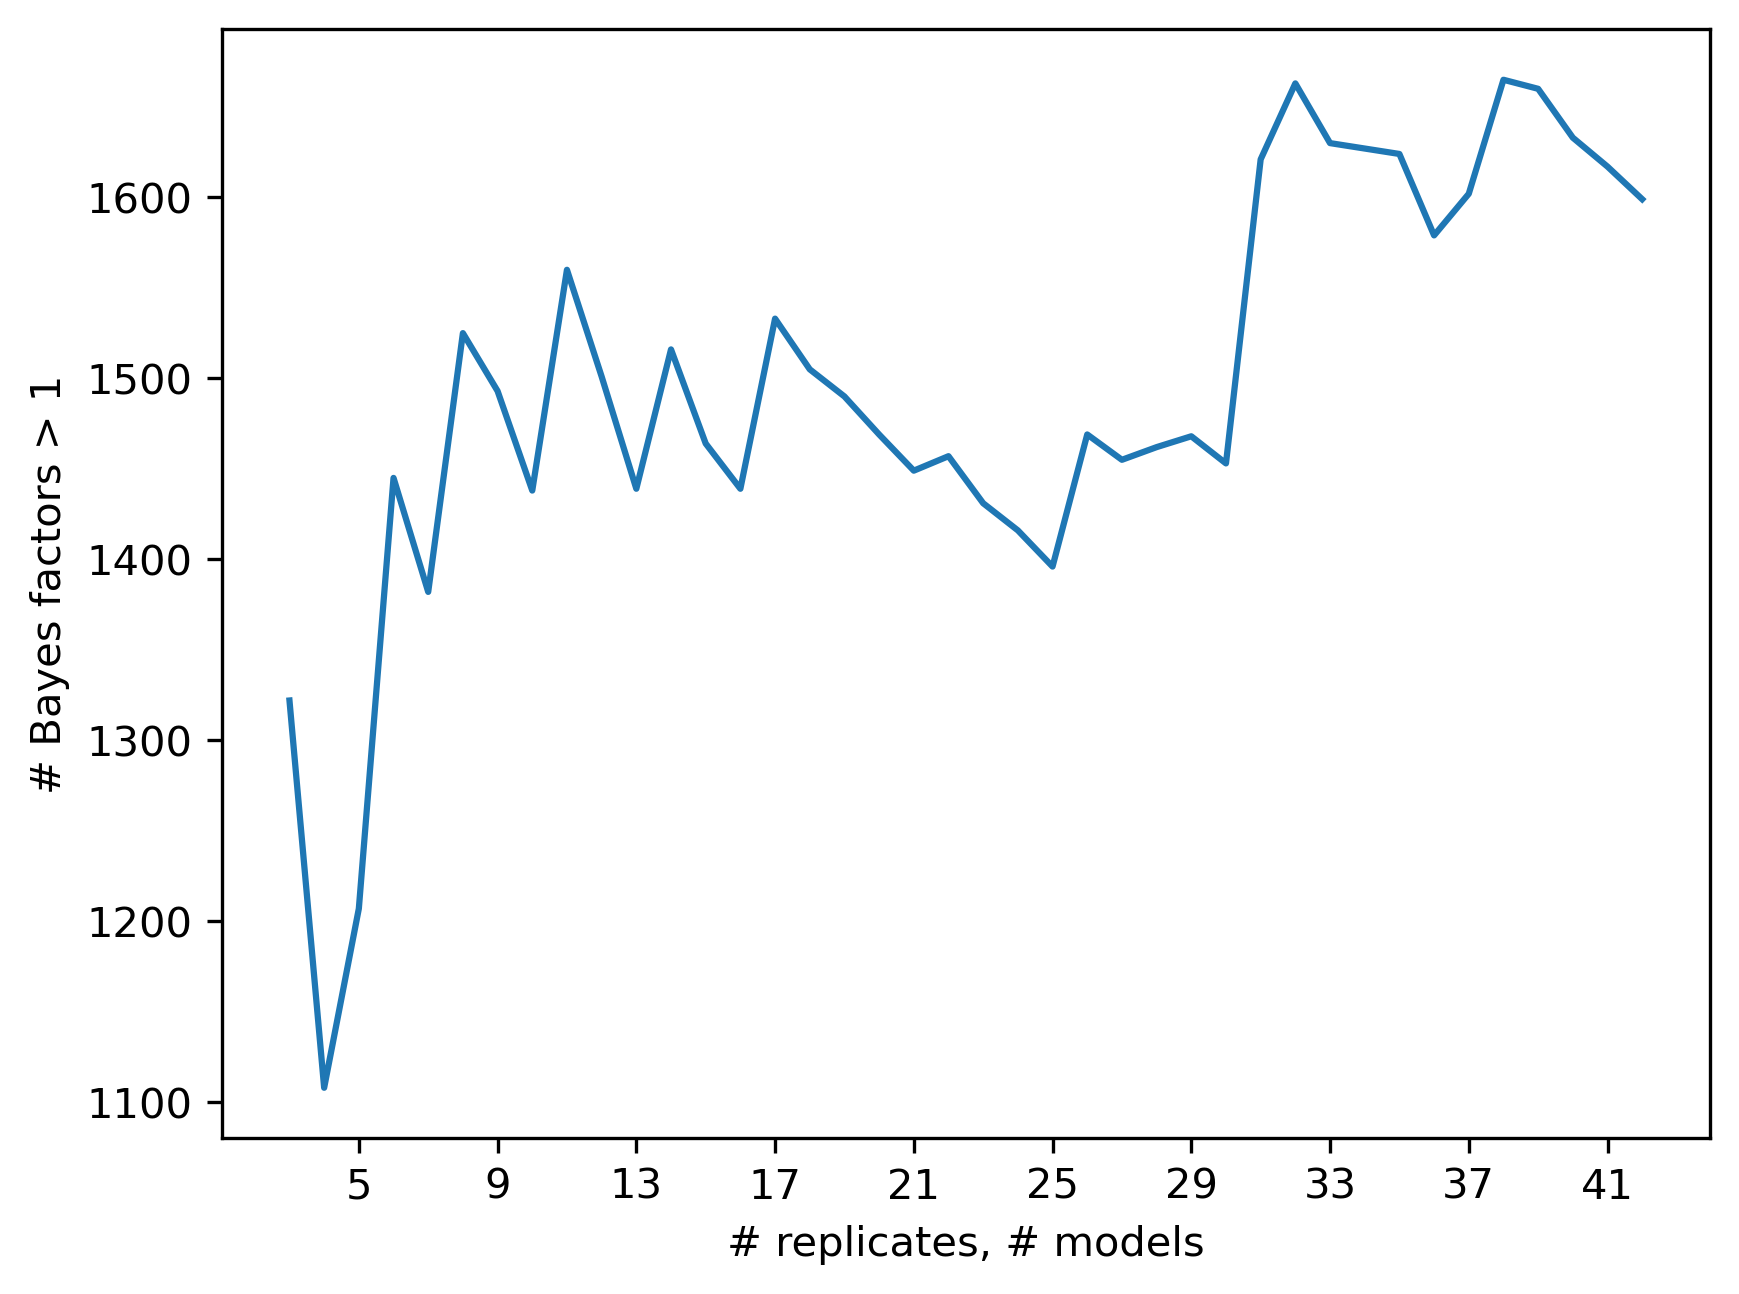

In [6]:
# this is the general idea

# finding the number of genes with nBF > 1 while increasing number of reps
series = (WT_cumu.iloc[:,1:] > 1).sum()

series.plot(xlabel='# replicates, # models', ylabel='# Bayes factors > 1', xticks=range(2,len(series),4), legend=False)


plt.show()

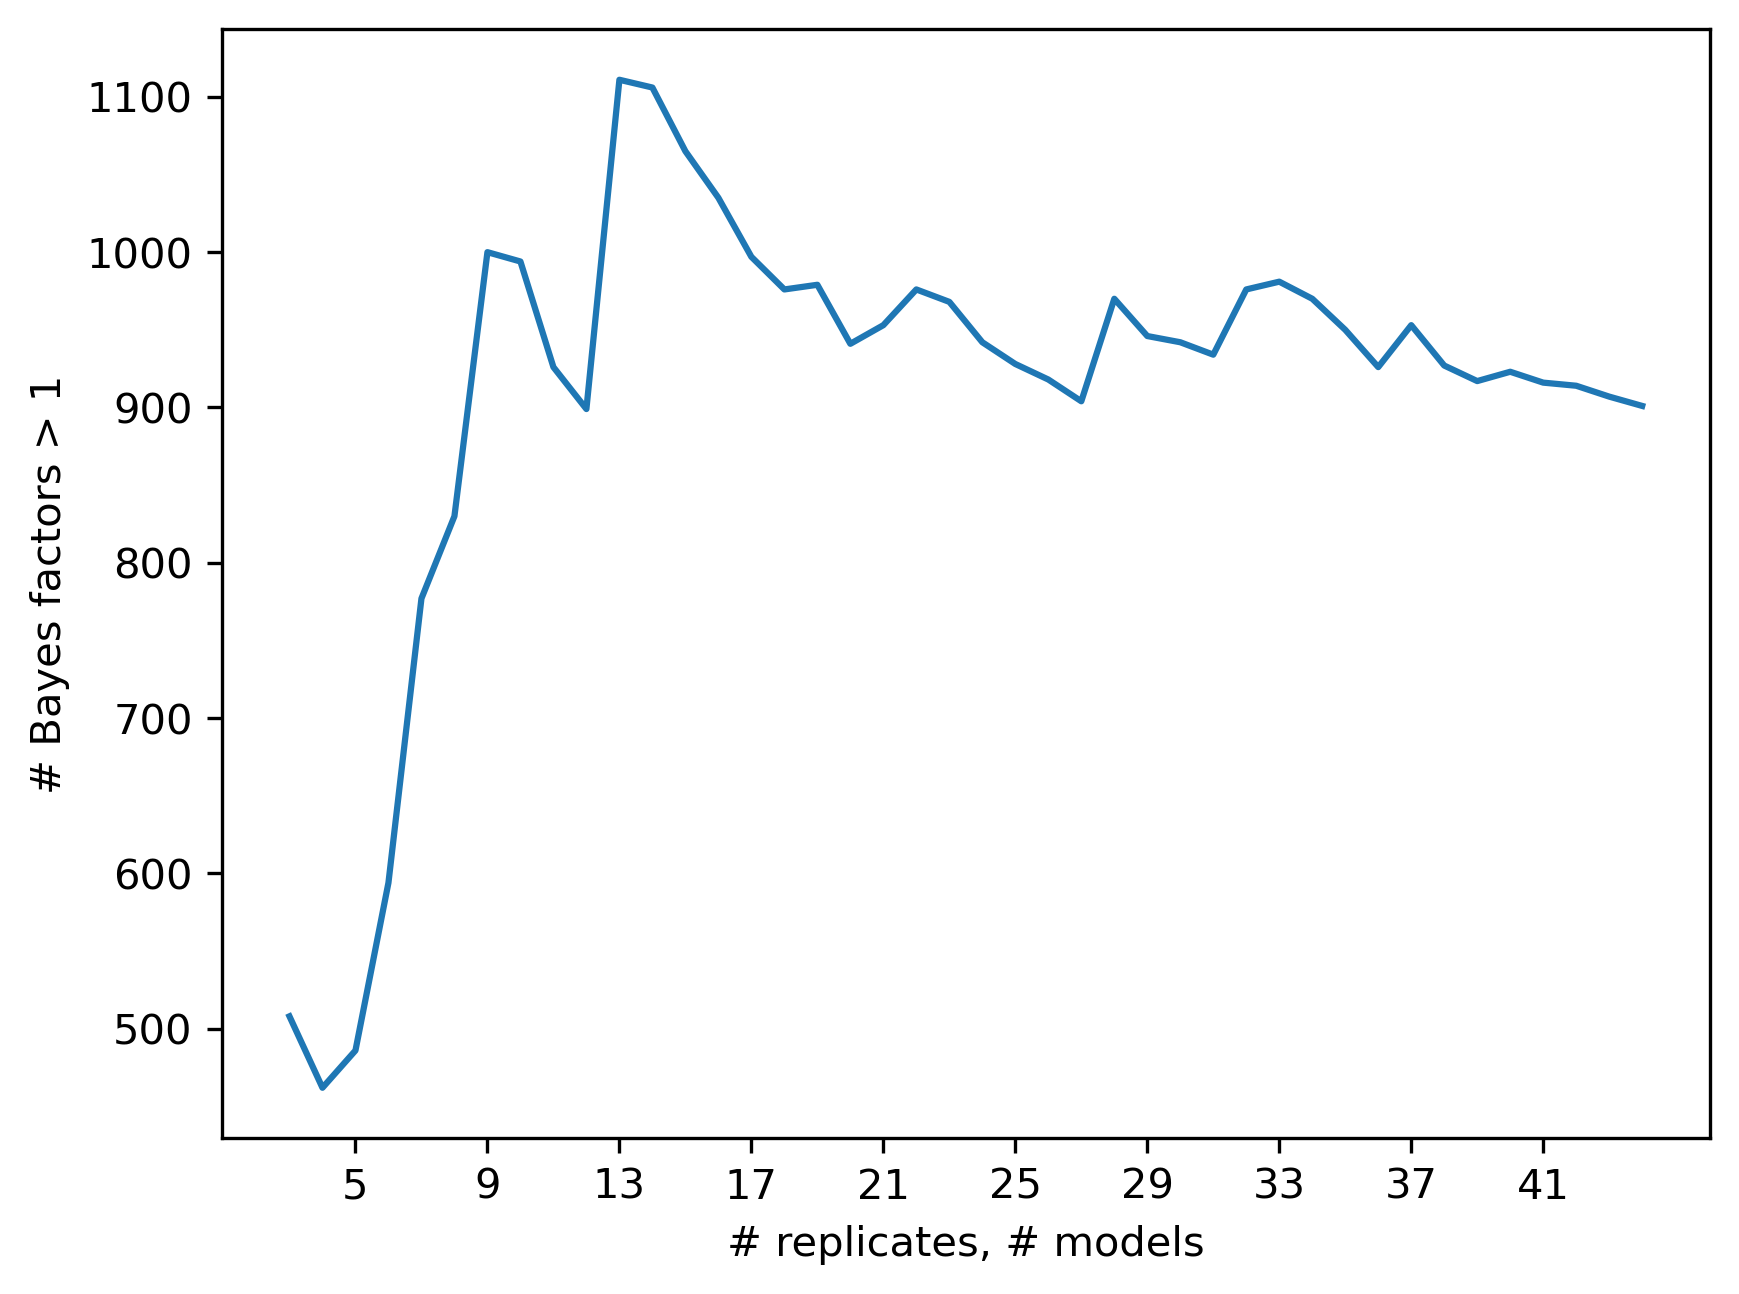

In [7]:
# this is the general idea

# finding the number of genes with nBF > 1 while increasing number of reps
series = (Snf2_cumu.iloc[:,1:] > 1).sum()


series.plot(xlabel='# replicates, # models', ylabel='# Bayes factors > 1', xticks=range(2,len(series),4), legend=False)

plt.show()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
2,238,1129,2635,1511,759,580,1712,1075,338,494,1802,2046,316,1564,1798,940,465,173,1120,712
3,1095,1403,2966,1566,565,448,2150,801,744,1707,1309,2155,1478,1119,1532,1603,719,436,896,663
4,1253,1451,2590,1615,486,436,1875,670,1252,1531,1125,1858,1286,1442,1295,1308,2390,986,1267,1004
5,1330,1638,2179,1377,498,670,1648,691,1080,1573,1316,1879,1252,1483,1513,1357,2060,961,1240,897
6,1231,1466,2126,1384,743,943,1528,1098,1540,1559,1313,1892,1334,1604,2178,1510,2543,1344,1229,1073
7,1297,1397,1978,1387,1045,1094,1566,1090,1508,1486,1292,1812,1308,1527,2286,1365,2438,1346,1325,998
8,1247,1368,1841,1342,981,1223,1507,1089,1400,1798,1324,1698,1826,1414,2197,1341,2453,1269,1307,1345
9,1301,1991,1782,1350,1165,1282,1686,1095,1414,1751,1292,1640,1719,1305,2055,1327,2260,1279,1231,1329
10,1304,1937,1701,1366,1253,1336,1590,1130,1467,1835,1253,1584,1787,1672,2117,1483,2114,1244,1278,1541
11,1293,1802,1585,1348,1387,1268,1566,1154,1422,1738,1412,1553,1708,1661,1997,1414,2047,1422,1390,1508


<AxesSubplot:xlabel='# replicates, # models', ylabel='# nBF > 1 of 7126 genes'>

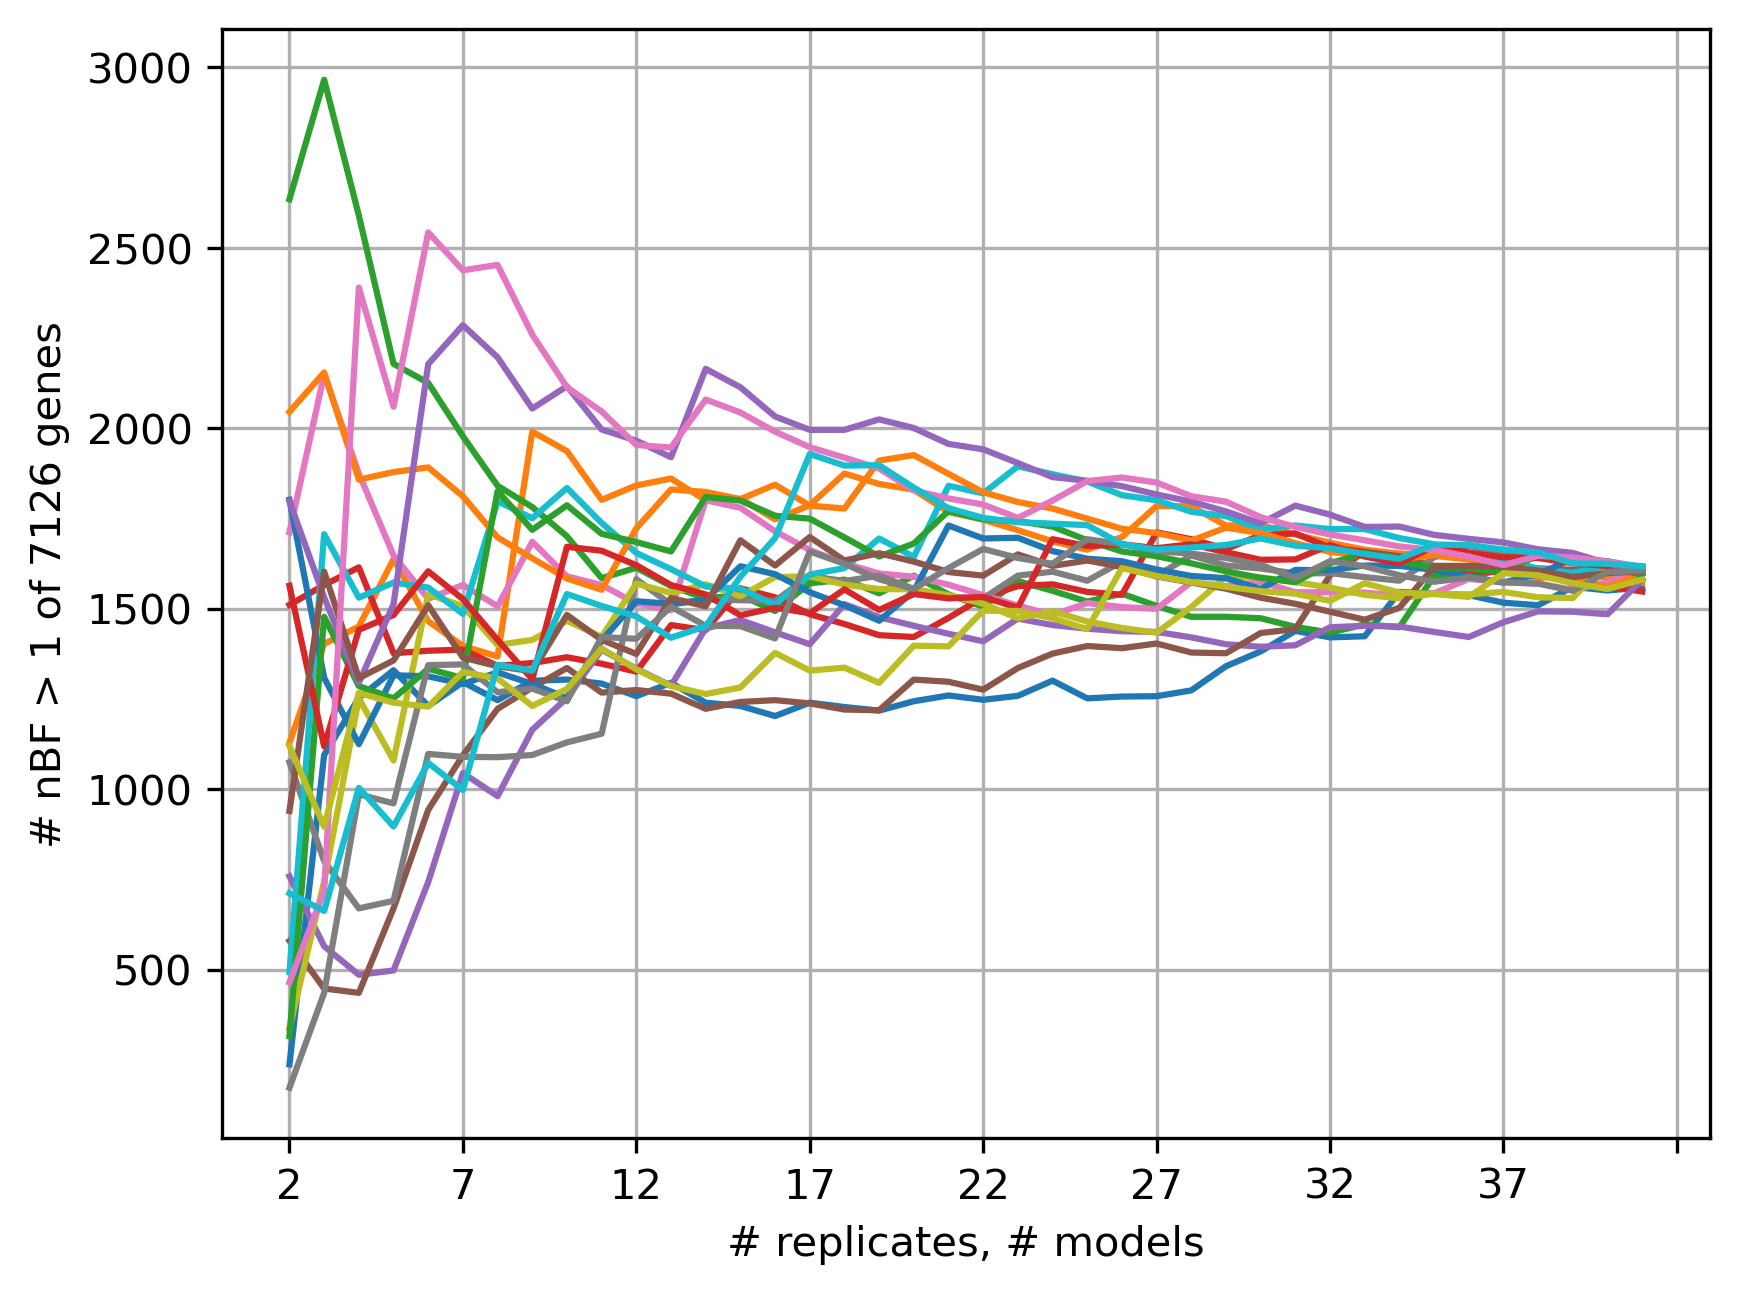

In [8]:
# then bootstrapping this idea
# 20 times for figure

WT_cons_it = pd.DataFrame({})
# let's do this with more iterations
# WT_AOTP = []

for i in range(20):

    col_order = np.array(WT_yeast.columns[1:])
    np.random.shuffle(col_order)
    # print(col_order)

    cumu_nBFs = get_cumu_BF(WT_yeast[col_order])
    # WT_AOTP.append(WT_yeast.loc[(cumu_nBFs).iloc[:,-1] > 1].index)

    WT_cons_it[f'{i+1}'] = ((cumu_nBFs) > 1).sum()

display(WT_cons_it)

display(WT_cons_it.plot(legend=False, grid=True,
                        xlabel='# replicates, # models',
                        ylabel='# nBF > 1 of 7126 genes'
                        ))

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
2,332,591,1989,1731,1348,654,949,1447,1518,941,...,596,1265,614,539,1423,316,1203,1772,2393,317
3,331,1285,1730,1238,1120,1211,988,1446,1450,1077,...,772,1289,1114,353,1874,985,813,1608,2218,1185
4,993,1459,1718,1273,1035,1524,859,1483,1360,909,...,1176,1202,1275,350,2026,895,1084,1498,1729,1901
5,865,1400,1490,1833,1174,1693,891,1399,1535,1279,...,1355,1852,1142,534,1957,748,1054,1327,2462,1638
6,918,1464,1590,2249,1323,1652,1413,1400,1387,1338,...,1810,2155,1096,1209,1848,1111,1414,1247,2484,1666
7,1174,1953,1516,2173,1253,1705,1383,1308,1322,1277,...,1776,1929,1050,1162,1887,1106,1292,1142,2307,1786
8,1060,1927,1477,2106,1223,1720,1448,1649,1414,1198,...,1729,1756,1106,1352,1732,1095,1749,1197,2373,1752
9,1242,2006,1443,1987,1791,1586,1451,1797,1354,1415,...,1608,1664,1101,1288,1643,1071,1943,1222,2225,1778
10,1357,2056,1461,1884,1720,1532,1367,1829,1622,1521,...,1924,1557,1128,1252,1599,1111,1797,1248,2062,1676
11,1326,1965,1518,1830,1643,1579,1767,1736,1611,1472,...,2061,1484,1311,1661,1515,1136,1694,1267,2011,1670


<AxesSubplot:xlabel='# replicates, # models', ylabel='# nBF > 1 of 7126 genes'>

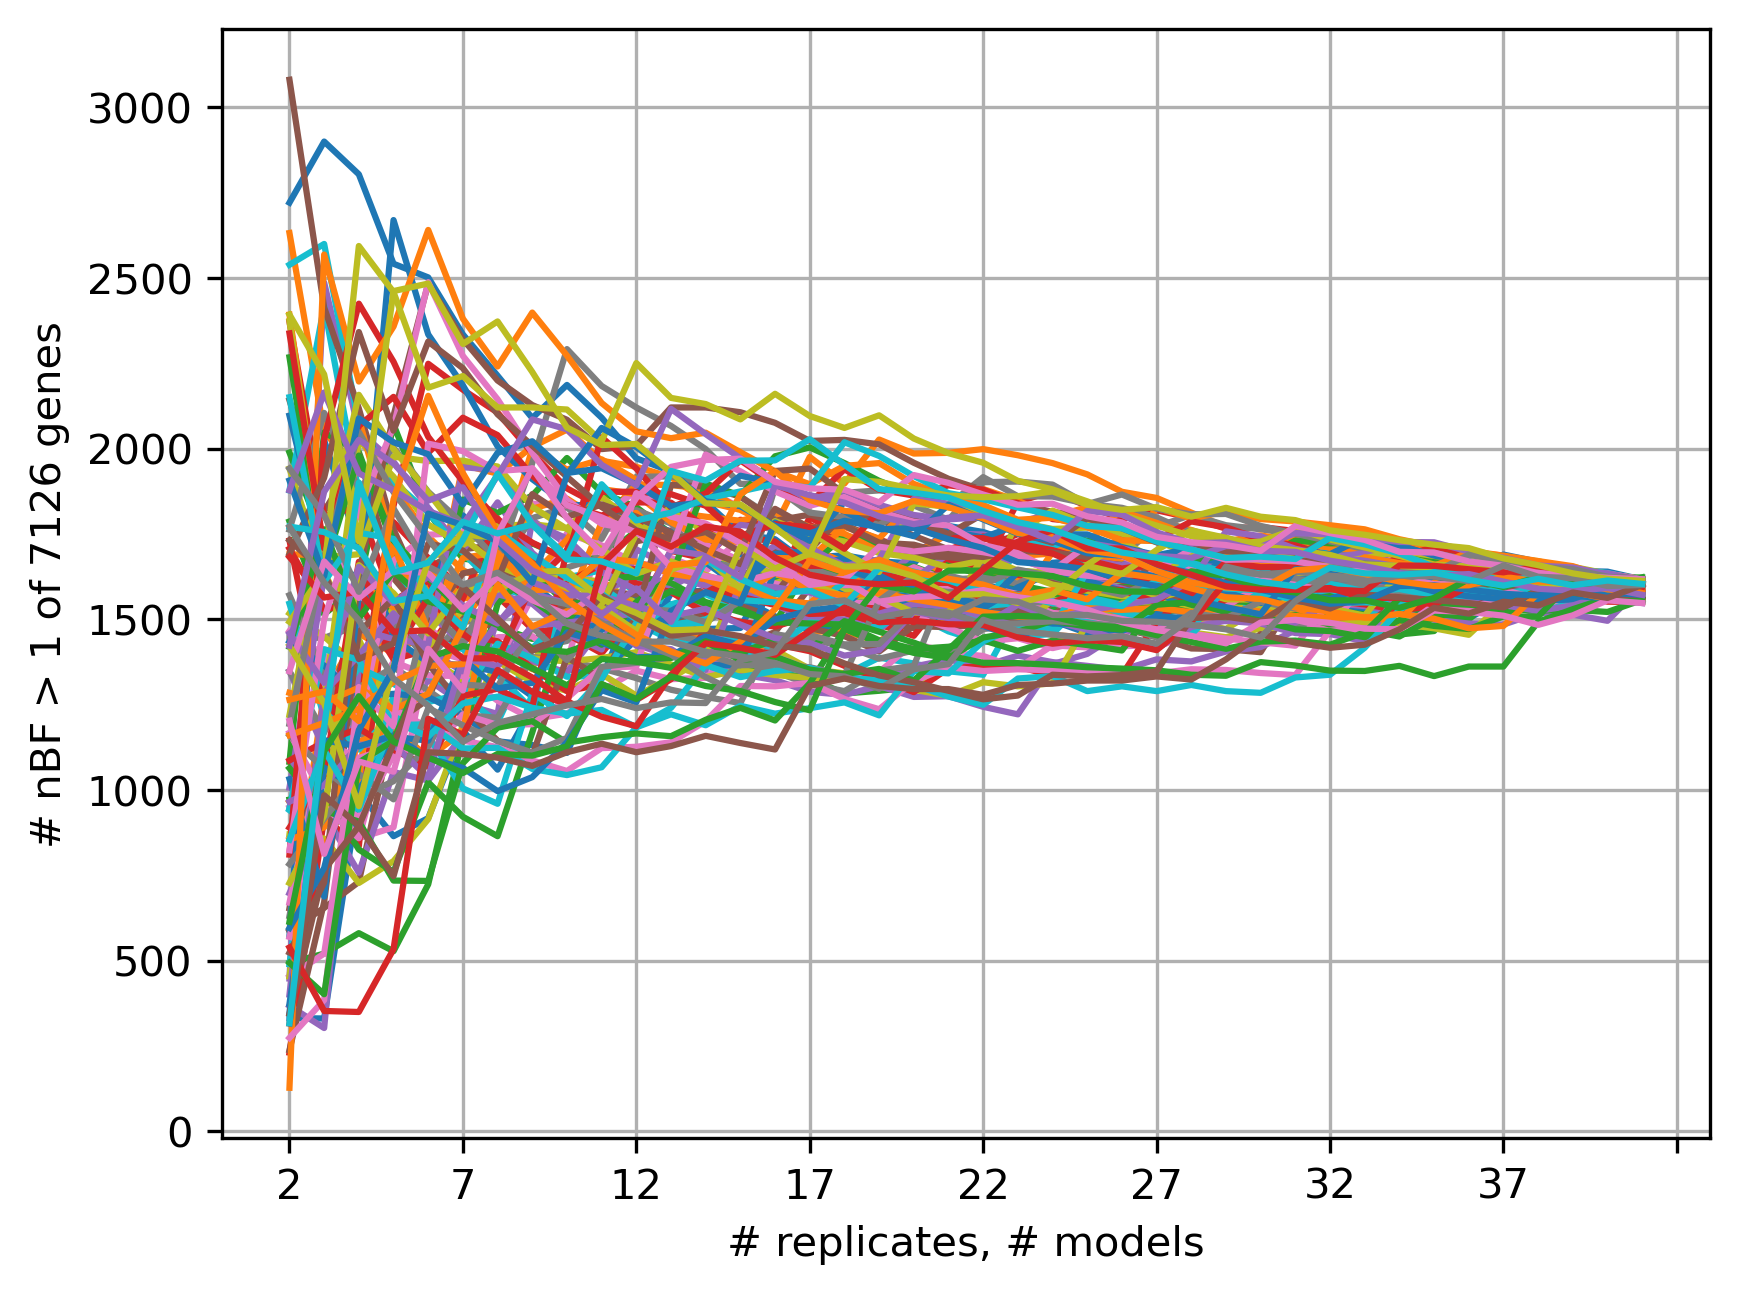

In [9]:
# then bootstrapping this idea
# 100 times for identifying genes

WT_cons_it = pd.DataFrame({})
WT_AOTP = []

for i in range(100):

    col_order = np.array(WT_yeast.columns[1:])
    np.random.shuffle(col_order)
    # print(col_order)

    cumu_nBFs = get_cumu_BF(WT_yeast[col_order])
    WT_AOTP.append(WT_yeast.loc[(cumu_nBFs).iloc[:,-1] > 1].index)

    WT_cons_it[f'{i+1}'] = ((cumu_nBFs) > 1).sum()

display(WT_cons_it)

display(WT_cons_it.plot(legend=False, grid=True,
                        xlabel='# replicates, # models',
                        ylabel='# nBF > 1 of 7126 genes'
                        ))

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
2,379,415,709,326,401,869,226,478,591,412,508,468,434,570,395,866,728,1362,975,326
3,554,516,781,270,663,1109,660,740,1097,436,523,575,602,516,509,1876,1079,1625,920,416
4,534,482,767,542,753,936,600,753,1061,695,468,693,598,925,551,1976,897,1428,1488,356
5,652,666,822,578,1131,789,1238,671,982,1100,497,598,528,890,534,1701,810,1729,1217,462
6,859,778,720,645,952,855,1133,601,1036,978,563,631,529,849,646,1431,1020,1627,1591,521
7,1222,746,888,696,880,779,1139,545,1076,963,587,579,537,874,694,1360,1174,1514,1411,877
8,1336,732,824,698,907,826,1009,533,1022,886,531,553,515,846,635,1204,1055,1400,1383,1085
9,1307,717,781,859,1212,747,1126,625,1110,874,567,535,645,798,728,1276,957,1263,1377,1019
10,1242,679,750,843,1146,803,1121,665,1048,1011,580,515,670,736,701,1264,890,1326,1298,989
11,1215,628,713,774,1192,957,1079,910,1042,947,570,545,671,712,644,1263,863,1259,1230,952


<AxesSubplot:xlabel='# replicates, # models', ylabel='# nBF > 1 of 7126 genes'>

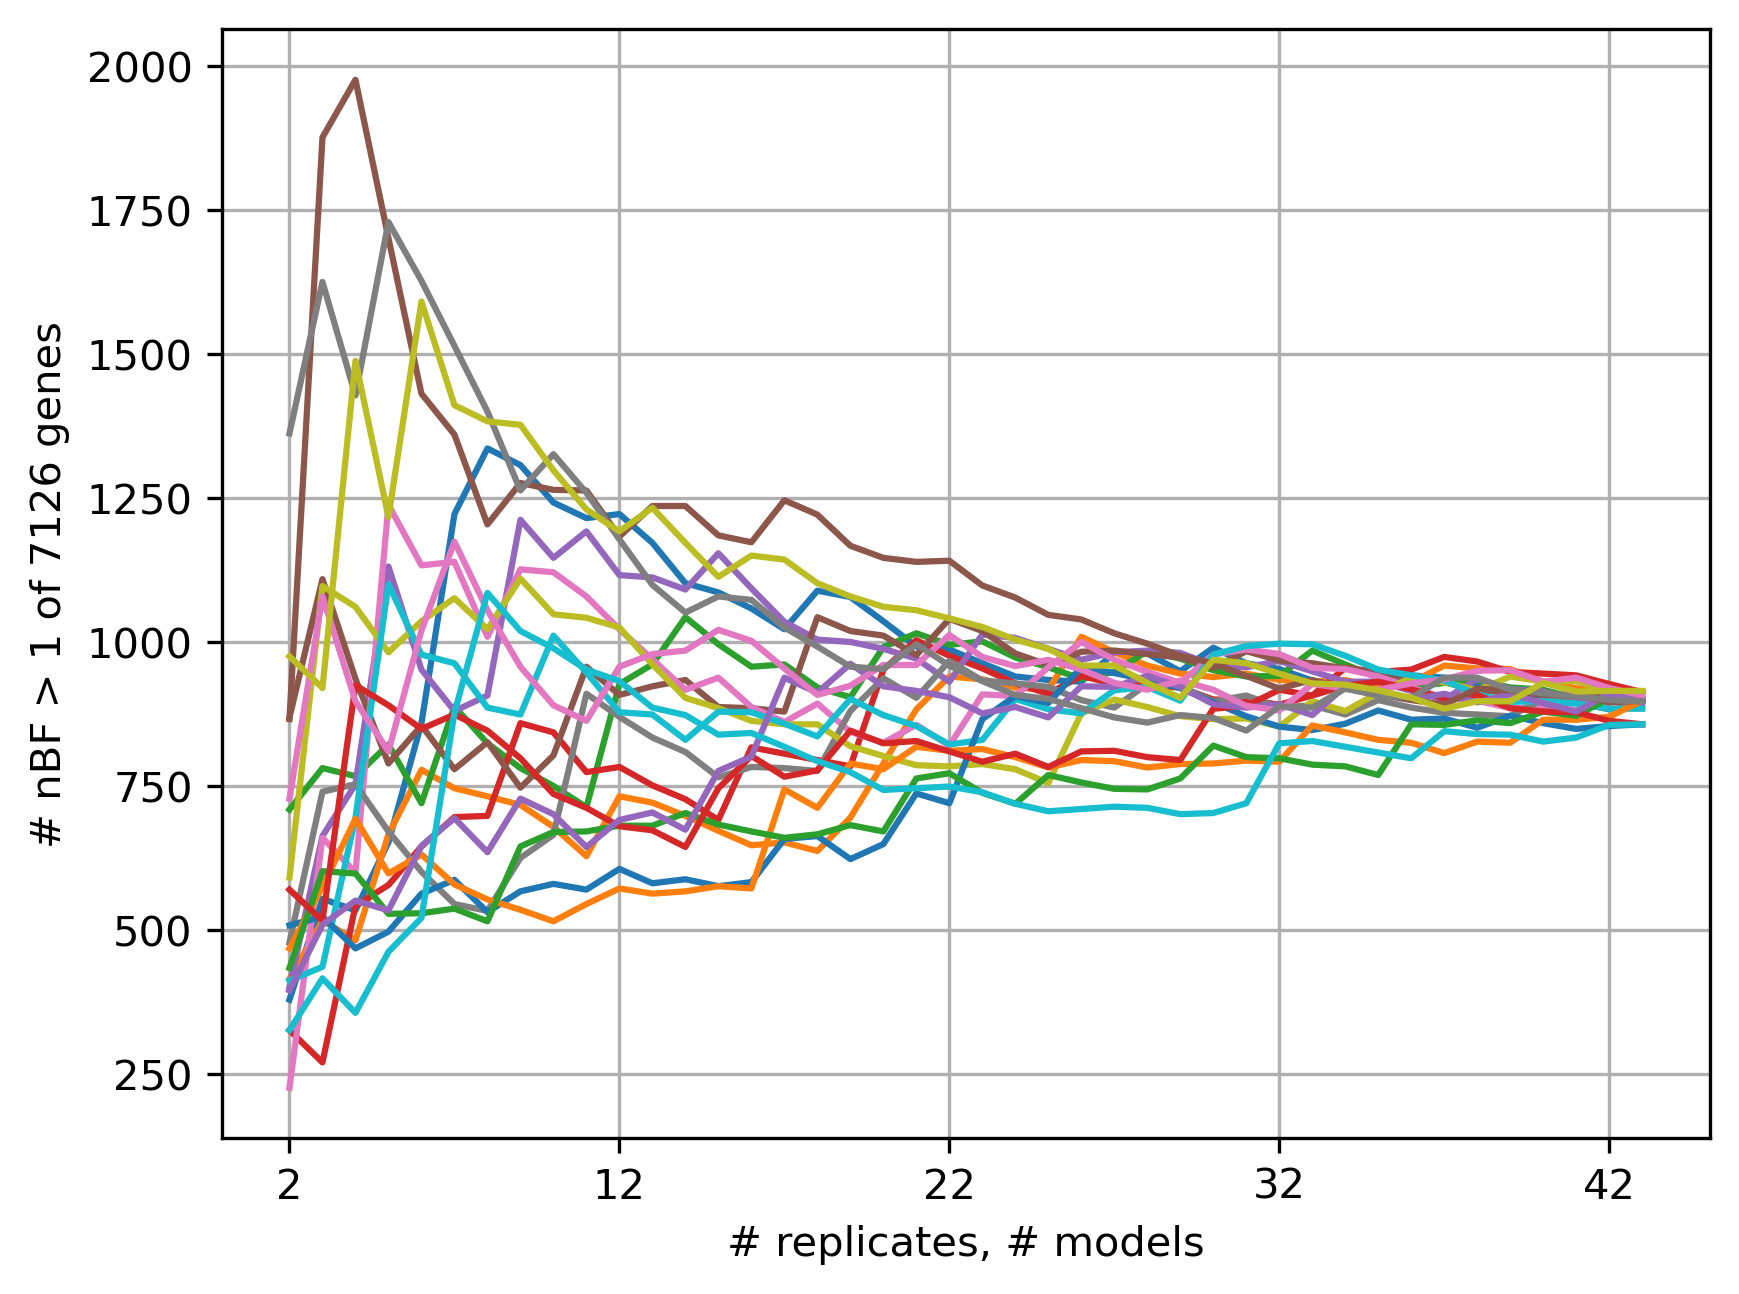

In [10]:
# again, bootstrapping this idea but on the mutant

Snf2_cons_it = pd.DataFrame({})
# Snf2_AOTP = []
# lets do this with more iterations

for i in range(20):

    col_order = np.array(Snf2_yeast.columns[1:])
    np.random.shuffle(col_order)
    # print(col_order)

    cumu_nBFs = get_cumu_BF(Snf2_yeast[col_order])
    # Snf2_AOTP.append(Snf2_yeast.loc[(cumu_nBFs).iloc[:,-1] > 1].index)

    Snf2_cons_it[f'{i+1}'] = ((cumu_nBFs) > 1).sum()

display(Snf2_cons_it)

display(Snf2_cons_it.plot(legend=False, grid=True,
                        xlabel='# replicates, # models',
                        ylabel='# nBF > 1 of 7126 genes'
                        ))

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
2,496,353,288,1076,1130,760,303,2085,668,213,...,657,359,907,699,330,583,821,415,875,574
3,426,473,597,809,730,657,446,1544,1024,1478,...,1243,318,810,1274,382,595,547,623,1048,799
4,556,1539,505,773,1057,877,656,1339,876,1285,...,1144,298,882,1188,1088,1270,694,619,854,838
5,588,1211,575,804,1113,800,588,1222,724,1198,...,1131,728,813,1059,1140,1467,990,615,820,700
6,570,1235,631,827,1100,1009,529,1011,722,1112,...,1293,811,1031,942,1044,1470,997,925,946,718
7,545,1526,632,825,977,857,757,971,648,1055,...,1303,720,1231,927,907,1361,1057,1004,836,937
8,556,1360,641,838,1050,852,692,874,704,954,...,1304,699,1173,882,802,1326,947,907,810,917
9,558,1244,660,807,1045,1000,690,875,659,886,...,1179,671,1091,835,796,1223,868,1074,747,921
10,576,1163,615,878,949,1004,722,899,802,953,...,1068,709,1110,836,796,1138,842,1188,932,863
11,562,1112,617,857,894,1193,887,875,791,1117,...,1308,716,1049,790,764,1077,794,1115,930,813


<AxesSubplot:xlabel='# replicates, # models', ylabel='# nBF > 1 of 7126 genes'>

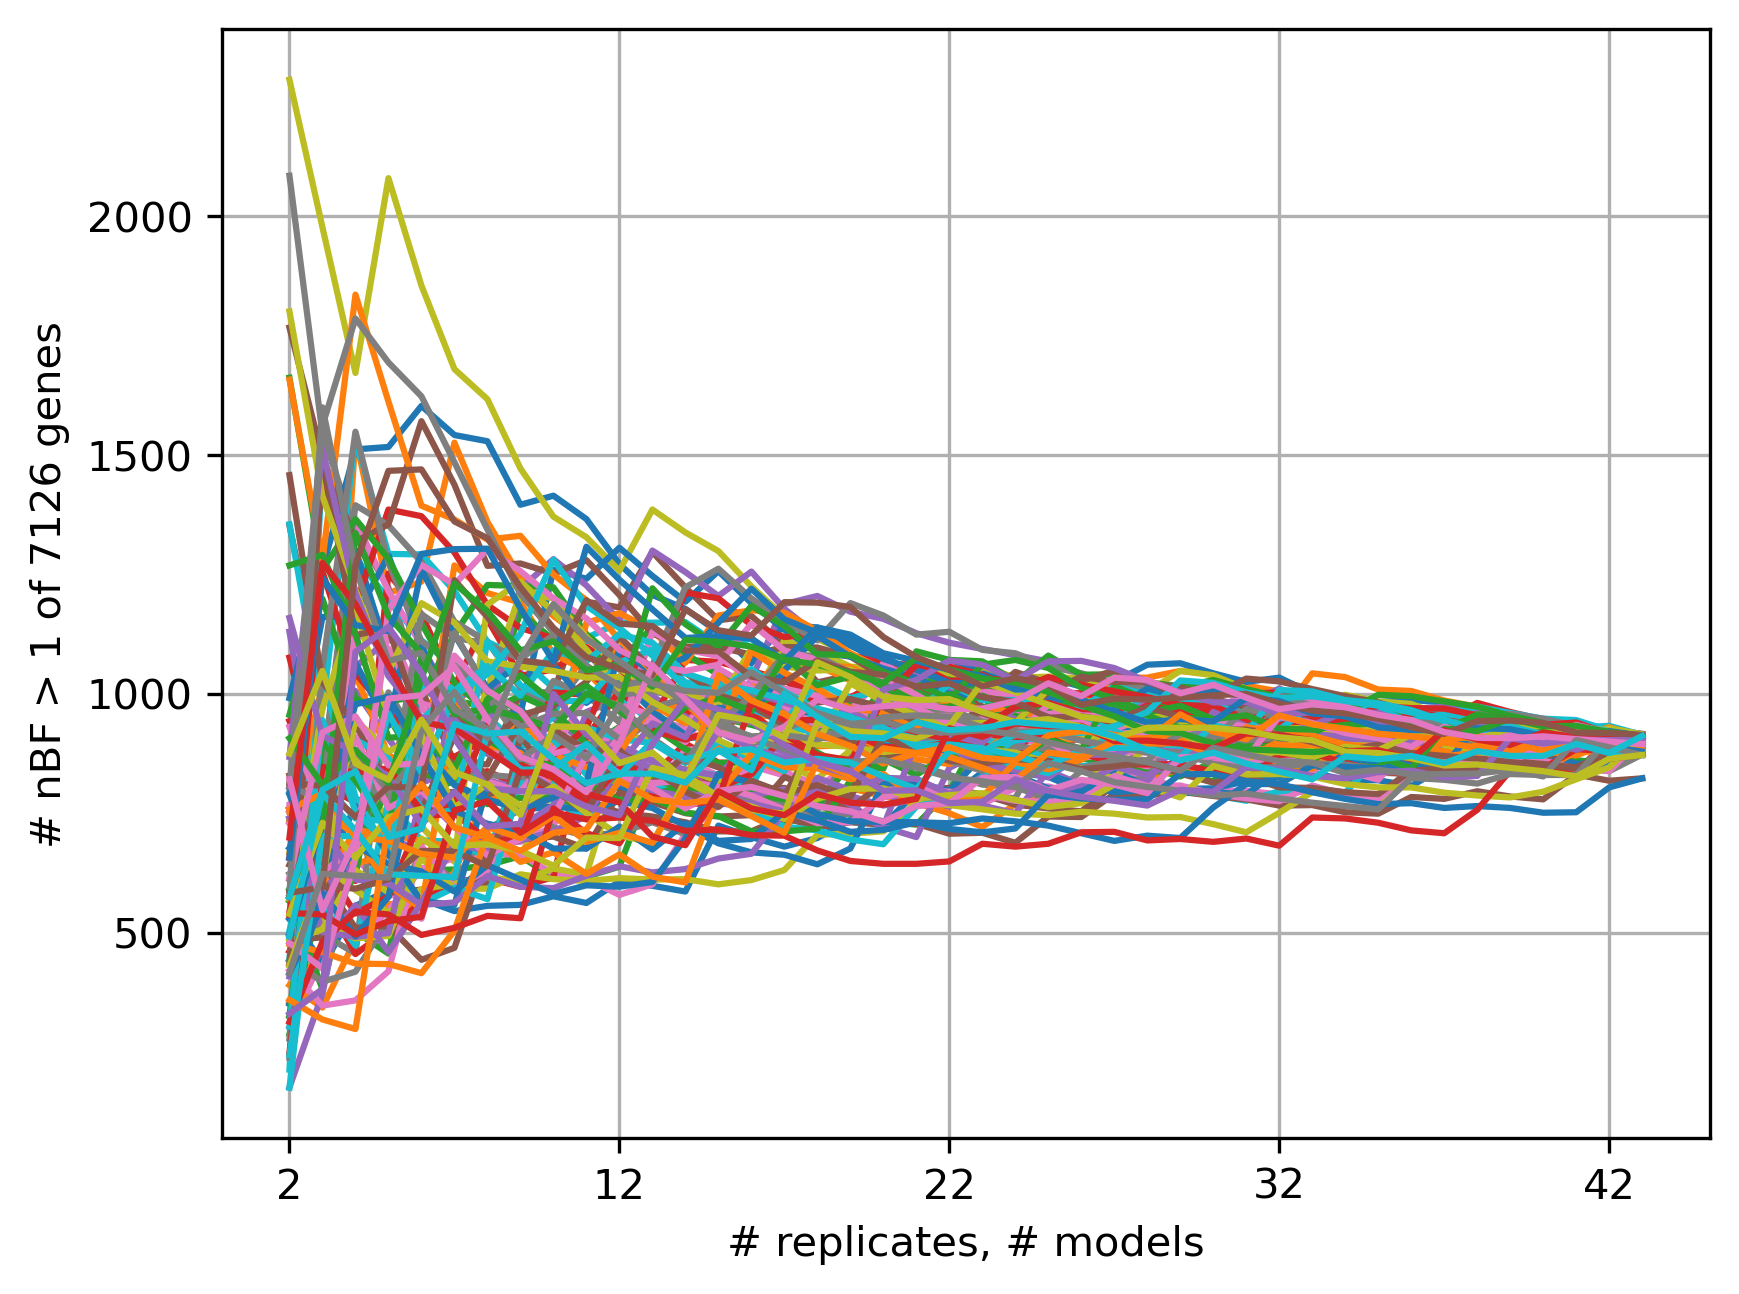

In [11]:
# again, bootstrapping this idea but on the mutant

Snf2_cons_it = pd.DataFrame({})
Snf2_AOTP = []

for i in range(100):

    col_order = np.array(Snf2_yeast.columns[1:])
    np.random.shuffle(col_order)
    # print(col_order)

    cumu_nBFs = get_cumu_BF(Snf2_yeast[col_order])
    Snf2_AOTP.append(Snf2_yeast.loc[(cumu_nBFs).iloc[:,-1] > 1].index)

    Snf2_cons_it[f'{i+1}'] = ((cumu_nBFs) > 1).sum()

display(Snf2_cons_it)

display(Snf2_cons_it.plot(legend=False, grid=True,
                        xlabel='# replicates, # models',
                        ylabel='# nBF > 1 of 7126 genes'
                        ))

In [12]:
# Checking for overlaps in Snf2_AOTP

# Convert each inner list to a set
sets = [set(lst) for lst in Snf2_AOTP]

print('# genes with nBF > 1 for all replicates throughout the iterations')
for lst in Snf2_AOTP:
    print(len(lst))

# Find the intersection of all sets
Snf2_overlap = set.intersection(*sets)

# Print the Snf2_overlap
print('overlap: ', len(Snf2_overlap))
# print(Snf2_overlap)


# Find the union of all sets
Snf2_union = set.union(*sets)

# Print the union
# print(Snf2_union)
print('union: ', len(Snf2_union))


# genes with nBF > 1 for all replicates throughout the iterations
902
896
897
895
916
916
895
900
895
897
897
907
906
906
914
905
905
914
907
873
902
914
889
897
912
823
912
873
901
914
900
912
905
896
899
912
907
901
911
914
901
910
900
907
901
913
911
912
897
911
901
895
903
896
901
907
914
914
907
907
910
899
903
906
879
907
907
915
915
901
912
889
907
911
896
873
895
901
912
906
823
912
901
907
900
872
901
900
896
872
879
898
911
912
905
914
895
872
872
912
overlap:  777
union:  922


In [13]:
# Checking for overlaps in WT_AOTP

# Convert each inner list to a set
sets = [set(lst) for lst in WT_AOTP]

print('# genes with nBF > 1 for all replicates throughout the iterations')
for lst in WT_AOTP:
    print(len(lst))

# Find the intersection of all sets
WT_overlap = set.intersection(*sets)

# Print the WT_overlap
print('overlap: ', len(WT_overlap))
# print(WT_overlap)


# Find the union of all sets
WT_union = set.union(*sets)

# Print the union
# print(WT_union)
print('union: ', len(WT_union))


# genes with nBF > 1 for all replicates throughout the iterations
1606
1617
1623
1605
1605
1617
1597
1598
1601
1612
1580
1581
1617
1551
1617
1580
1613
1557
1610
1559
1604
1618
1604
1618
1598
1604
1594
1610
1608
1611
1608
1618
1614
1557
1594
1606
1610
1606
1610
1596
1617
1611
1557
1597
1548
1572
1611
1618
1618
1614
1551
1581
1605
1608
1572
1557
1617
1618
1617
1606
1618
1611
1596
1602
1611
1605
1618
1606
1597
1551
1603
1607
1613
1559
1615
1580
1594
1617
1594
1598
1614
1551
1557
1614
1606
1572
1548
1617
1606
1604
1572
1580
1623
1596
1572
1601
1618
1601
1613
1604
overlap:  1439
union:  1633


In [14]:
RALL_bayexpress = pd.read_csv('DGE_results/RALL_bayexpress.csv').iloc[:,1:].rename(columns={'genes': "locus_name"})

RALL_bayexpress

,locus_name,BF,FC
0,15S_rRNA,-3.710645,0.274047
1,21S_rRNA,-1.302642,0.147177
2,HRA1,-5.206545,-0.564787
3,ICR1,76.746125,0.504048
4,LSR1,0.451012,0.120243
...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839
7122,tY(GUA)M1,-7.406574,0.022303
7123,tY(GUA)M2,-7.727890,0.183767
7124,tY(GUA)O,-7.622253,0.347266


In [15]:
# let's see what those AOTP genes are

display(RALL_bayexpress.iloc[list(WT_union)])
display(RALL_bayexpress.iloc[list(Snf2_union)])

# hmm interesting

,locus_name,BF,FC
1,21S_rRNA,-1.302642,0.147177
4,LSR1,0.451012,0.120243
41,RDN5-1,13.774601,0.316040
46,RDN5-6,15.230943,0.469612
56,RUF5-1,-1.191579,0.080133
...,...,...,...
6731,YPR191W,218.989419,0.279871
6745,YPR204W,814.266672,0.541523
6752,snR17a,7.383833,0.329308
6761,snR30,20.556922,0.159709


,locus_name,BF,FC
0,15S_rRNA,-3.710645,0.274047
1,21S_rRNA,-1.302642,0.147177
4,LSR1,0.451012,0.120243
4100,YLL021W,891.706282,0.521375
4103,YLL024C,9077.546061,-0.490986
...,...,...,...
4063,YKR094C,158.639355,-0.086969
4064,YKR095W,1141.755429,0.533953
4068,YKR098C,843.035626,0.732050
4085,YLL008W,1202.946112,-0.845752


In [16]:
# let's see what AOTP genes have BF > 1

display(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF > 1])
display(RALL_bayexpress.iloc[list(Snf2_union)].loc[RALL_bayexpress.BF > 1])

# hmm interesting

,locus_name,BF,FC
41,RDN5-1,13.774601,0.316040
46,RDN5-6,15.230943,0.469612
58,SCR1,10.530223,0.125605
59,SRG1,365.733360,-0.939803
60,TLC1,777.763124,0.472738
...,...,...,...
6731,YPR191W,218.989419,0.279871
6745,YPR204W,814.266672,0.541523
6752,snR17a,7.383833,0.329308
6761,snR30,20.556922,0.159709


,locus_name,BF,FC
4100,YLL021W,891.706282,0.521375
4103,YLL024C,9077.546061,-0.490986
4105,YLL026W,6986.693811,-0.641283
4118,YLL039C,533.296466,0.257212
4120,YLL041C,3.231386,0.060734
...,...,...,...
4060,YKR091W,757.902699,-0.557891
4063,YKR094C,158.639355,-0.086969
4064,YKR095W,1141.755429,0.533953
4068,YKR098C,843.035626,0.732050


In [17]:
# calculating average <q> for each additional replicate for the plots


def get_avq(data):
    output = pd.DataFrame({'genes': data.genes})
    for k in range(2,len(data.columns)):

        N = sum(data.iloc[:,1:k].sum(axis=0, numeric_only=True))

        n_i = data.iloc[:,1:k].sum(axis=1, numeric_only=True)
        
        output[f'{k-1}'] = (n_i + 1) / (N+2)

    return output


# WT_yeast = get_BF(WT_yeast)

# display(WT_yeast)

# Snf2_yeast = get_BF(Snf2_yeast)

# display(Snf2_yeast)

WT_yeast_avq = get_avq(WT_yeast)

display(WT_yeast_avq)


Snf2_yeast_avq = get_avq(Snf2_yeast)

display(Snf2_yeast_avq)


WT_yeast_avq.to_csv('WT_yeast_avq.csv')
Snf2_yeast_avq.to_csv('Snf2_yeast_avq.csv')

,genes,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,15S_rRNA,5.030082e-07,1.082671e-06,2.266838e-06,1.757651e-06,1.936241e-06,1.611843e-06,1.414441e-06,1.262933e-06,1.211224e-06,...,1.904640e-06,1.853748e-06,1.946728e-06,1.911901e-06,1.879292e-06,1.874652e-06,1.864698e-06,1.802844e-06,1.838121e-06,1.808986e-06
1,21S_rRNA,3.521057e-06,7.001270e-06,9.757261e-06,9.667083e-06,1.097203e-05,9.352440e-06,8.599160e-06,7.869044e-06,7.712282e-06,...,1.143895e-05,1.116937e-05,1.165616e-05,1.143130e-05,1.125617e-05,1.124791e-05,1.114460e-05,1.082007e-05,1.111147e-05,1.103367e-05
2,HRA1,6.706775e-07,4.330683e-07,3.942327e-07,3.254910e-07,3.356151e-07,3.373626e-07,3.536103e-07,3.053245e-07,3.213451e-07,...,3.409082e-07,3.498319e-07,3.457776e-07,3.543033e-07,3.621552e-07,3.608785e-07,3.579971e-07,3.515545e-07,3.605317e-07,3.538079e-07
3,ICR1,1.274287e-05,1.436343e-05,1.507940e-05,1.507023e-05,1.448308e-05,1.510635e-05,1.486771e-05,1.450291e-05,1.438637e-05,...,1.402170e-05,1.395360e-05,1.399016e-05,1.398161e-05,1.403270e-05,1.409661e-05,1.399302e-05,1.393298e-05,1.398095e-05,1.403248e-05
4,LSR1,1.022783e-05,1.616788e-05,2.252055e-05,2.018044e-05,2.098885e-05,2.226593e-05,2.221316e-05,2.034571e-05,2.072676e-05,...,2.320770e-05,2.282563e-05,2.321551e-05,2.321690e-05,2.314857e-05,2.302277e-05,2.269390e-05,2.223207e-05,2.225545e-05,2.218147e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1.676694e-07,1.443561e-07,9.855819e-08,6.509820e-08,5.163308e-08,7.496946e-08,6.429279e-08,5.551354e-08,4.943770e-08,...,1.852762e-08,1.803257e-08,1.728888e-08,1.671242e-08,1.631330e-08,1.596807e-08,1.556509e-08,1.502370e-08,1.477589e-08,1.426645e-08
7122,tY(GUA)M1,1.676694e-07,7.217804e-08,9.855819e-08,9.764730e-08,1.032662e-07,9.371182e-08,8.036599e-08,6.939192e-08,7.415655e-08,...,4.817182e-08,4.688468e-08,4.840887e-08,5.013727e-08,4.893989e-08,5.109783e-08,4.980829e-08,4.807583e-08,4.728285e-08,4.850592e-08
7123,tY(GUA)M2,1.676694e-07,7.217804e-08,9.855819e-08,6.509820e-08,5.163308e-08,3.748473e-08,4.821959e-08,4.163515e-08,3.707828e-08,...,1.482210e-08,1.442606e-08,1.383111e-08,1.336994e-08,1.305064e-08,1.277446e-08,1.245207e-08,1.201896e-08,1.182071e-08,1.141316e-08
7124,tY(GUA)O,1.676694e-07,7.217804e-08,4.927909e-08,3.254910e-08,2.581654e-08,1.874236e-08,3.214639e-08,2.775677e-08,2.471885e-08,...,1.111657e-08,1.081954e-08,1.037333e-08,1.336994e-08,1.305064e-08,1.277446e-08,1.245207e-08,1.201896e-08,1.182071e-08,1.141316e-08


,genes,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,15S_rRNA,4.888009e-07,3.699162e-07,4.332702e-07,4.431870e-07,1.392500e-06,1.178058e-06,1.093068e-06,9.750276e-07,1.354988e-06,...,2.247482e-06,2.162239e-06,2.153404e-06,2.107489e-06,2.068077e-06,2.252873e-06,2.219721e-06,2.264491e-06,2.219710e-06,2.184992e-06
1,21S_rRNA,3.128326e-06,2.642259e-06,2.635727e-06,3.050169e-06,1.045480e-05,8.800790e-06,8.213191e-06,7.299531e-06,8.343876e-06,...,1.195357e-05,1.158432e-05,1.153281e-05,1.139055e-05,1.119966e-05,1.252824e-05,1.236465e-05,1.273472e-05,1.249908e-05,1.232996e-05
2,HRA1,5.865611e-07,3.699162e-07,3.610585e-07,2.867680e-07,2.873412e-07,2.425414e-07,2.732670e-07,2.898731e-07,2.614890e-07,...,2.475201e-07,2.514231e-07,2.603689e-07,2.526609e-07,2.534122e-07,2.465408e-07,2.432571e-07,2.434937e-07,2.431111e-07,2.376114e-07
3,ICR1,2.013860e-05,2.124376e-05,2.213289e-05,2.255039e-05,2.192635e-05,2.195000e-05,2.166400e-05,2.130567e-05,2.095478e-05,...,1.977850e-05,1.973357e-05,1.970839e-05,1.967188e-05,1.975450e-05,1.979128e-05,1.981993e-05,1.979874e-05,1.982148e-05,1.987671e-05
4,LSR1,2.062740e-05,1.659338e-05,1.707807e-05,1.910918e-05,2.278837e-05,2.311074e-05,2.170954e-05,2.058099e-05,2.169170e-05,...,2.351111e-05,2.317493e-05,2.318508e-05,2.295350e-05,2.265855e-05,2.414683e-05,2.418197e-05,2.428173e-05,2.402572e-05,2.406074e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1.955204e-07,1.056903e-07,7.221170e-08,5.213964e-08,4.420634e-08,3.464878e-08,4.554450e-08,3.952815e-08,3.565759e-08,...,1.320107e-08,1.571395e-08,1.837898e-08,1.783489e-08,1.747671e-08,1.700282e-08,1.658571e-08,1.623291e-08,2.114009e-08,2.324459e-08
7122,tY(GUA)M1,9.776019e-08,5.284517e-08,7.221170e-08,5.213964e-08,8.841268e-08,6.929756e-08,6.072600e-08,5.270420e-08,4.754345e-08,...,4.950401e-08,5.028463e-08,5.207378e-08,5.350466e-08,5.243012e-08,5.100845e-08,4.975714e-08,4.869873e-08,4.756521e-08,4.648918e-08
7123,tY(GUA)M2,9.776019e-08,5.284517e-08,3.610585e-08,2.606982e-08,2.210317e-08,1.732439e-08,1.518150e-08,1.317605e-08,1.188586e-08,...,1.650134e-08,1.571395e-08,1.531582e-08,1.486241e-08,1.456392e-08,1.416901e-08,1.382143e-08,1.352743e-08,1.321256e-08,1.291366e-08
7124,tY(GUA)O,9.776019e-08,1.056903e-07,7.221170e-08,5.213964e-08,4.420634e-08,3.464878e-08,3.036300e-08,2.635210e-08,3.565759e-08,...,1.980160e-08,1.885673e-08,2.144214e-08,2.080737e-08,2.038949e-08,1.983662e-08,1.935000e-08,1.893840e-08,1.849758e-08,1.807913e-08


In [18]:
RALL_bayexpress['nBF_WT'] = get_nBF(WT_yeast.iloc[:,1:])
RALL_bayexpress['AOTP_WT'] = RALL_bayexpress.index.isin(WT_union)

RALL_bayexpress['nBF_Snf2'] = get_nBF(Snf2_yeast.iloc[:,1:])
RALL_bayexpress['AOTP_Snf2'] = RALL_bayexpress.index.isin(Snf2_union)

display(RALL_bayexpress)
RALL_bayexpress.to_csv('RALL_bayexpress.csv')

,locus_name,BF,FC,nBF_WT,AOTP_WT,nBF_Snf2,AOTP_Snf2
0,15S_rRNA,-3.710645,0.274047,-107.138056,False,53.627445,True
1,21S_rRNA,-1.302642,0.147177,362.115507,True,1052.203968,True
2,HRA1,-5.206545,-0.564787,-240.338654,False,-258.581365,False
3,ICR1,76.746125,0.504048,-194.077441,False,-196.467262,False
4,LSR1,0.451012,0.120243,251.787125,True,478.066414,True
...,...,...,...,...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839,-270.299503,False,-281.214963,False
7122,tY(GUA)M1,-7.406574,0.022303,-262.736078,False,-275.253246,False
7123,tY(GUA)M2,-7.727890,0.183767,-271.177492,False,-284.863866,False
7124,tY(GUA)O,-7.622253,0.347266,-270.291196,False,-282.682788,False


# How many genes would be marked as not consistent?

In [19]:
display((RALL_bayexpress.nBF_WT > 1).describe())

display((RALL_bayexpress.nBF_Snf2 > 1).describe())

display(((RALL_bayexpress.nBF_WT > 1) & (RALL_bayexpress.nBF_Snf2 > 1)).describe())

display(((RALL_bayexpress.nBF_WT > 1) | (RALL_bayexpress.nBF_Snf2 > 1)).describe())



count      7126
unique        2
top       False
freq       5524
Name: nBF_WT, dtype: object

count      7126
unique        2
top       False
freq       6223
Name: nBF_Snf2, dtype: object

count      7126
unique        2
top       False
freq       6359
dtype: object

count      7126
unique        2
top       False
freq       5388
dtype: object

In [20]:
WT_yeast_q = pd.DataFrame({})

for col in WT_yeast.columns[1:43]:

    WT_yeast_q[col+'_q'] = (WT_yeast[col]+1) / (sum(WT_yeast[col])+2)

WT_yeast_q.to_csv('WT_yeast_q.csv')

WT_yeast_q

,1_q,2_q,3_q,4_q,5_q,6_q,7_q,8_q,9_q,10_q,...,33_q,34_q,35_q,36_q,37_q,38_q,39_q,40_q,41_q,42_q
0,5.030082e-07,1.647548e-06,4.970523e-06,8.628760e-07,2.745867e-06,8.207817e-07,3.385883e-07,4.065404e-07,9.034018e-07,8.837392e-07,...,1.349760e-07,4.192114e-06,1.002461e-06,6.830799e-07,1.810945e-06,1.603579e-06,1.727728e-07,4.120753e-06,1.075839e-06,6.252496e-07
1,3.521057e-06,9.758554e-06,1.584354e-05,9.587511e-06,1.610077e-05,5.129886e-06,4.175923e-06,3.353958e-06,6.549663e-06,1.325609e-05,...,1.484737e-06,2.305663e-05,5.012305e-06,4.235095e-06,1.101658e-05,7.277780e-06,1.900501e-06,2.866611e-05,8.937736e-06,8.878545e-06
2,6.706775e-07,3.802034e-07,4.659866e-07,2.876253e-07,4.992486e-07,4.103909e-07,5.643139e-07,1.016351e-07,5.646261e-07,6.312423e-07,...,8.098563e-07,3.353691e-07,7.017227e-07,8.196959e-07,4.527362e-07,3.700566e-07,2.591592e-07,1.074979e-06,2.482704e-07,2.500999e-07
3,1.274287e-05,1.571507e-05,1.677552e-05,1.514827e-05,1.235640e-05,1.682602e-05,1.354353e-05,1.229785e-05,1.355103e-05,1.679104e-05,...,1.160794e-05,1.492393e-05,1.383396e-05,1.625730e-05,1.720398e-05,1.011488e-05,1.235325e-05,1.702050e-05,1.555828e-05,1.338034e-05
4,1.022783e-05,2.078445e-05,3.634695e-05,1.572352e-05,2.421356e-05,2.571783e-05,2.200824e-05,8.638984e-06,2.394015e-05,2.007350e-05,...,9.043395e-06,3.236312e-05,2.335734e-05,2.049240e-05,1.735489e-05,1.011488e-05,9.502503e-06,2.382870e-05,2.019266e-05,1.613144e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,1.676694e-07,2.534689e-07,1.553289e-07,9.587511e-08,1.248121e-07,2.051954e-07,1.128628e-07,1.016351e-07,1.129252e-07,1.262485e-07,...,1.349760e-07,8.384228e-08,1.002461e-07,1.366160e-07,1.509121e-07,1.233522e-07,8.638639e-08,1.791632e-07,8.275681e-08,1.250499e-07
7122,1.676694e-07,1.267345e-07,3.106577e-07,1.917502e-07,2.496243e-07,1.367970e-07,1.128628e-07,1.016351e-07,2.258505e-07,1.262485e-07,...,1.349760e-07,1.676846e-07,2.004922e-07,1.366160e-07,3.018241e-07,1.233522e-07,8.638639e-08,1.791632e-07,1.655136e-07,1.250499e-07
7123,1.676694e-07,1.267345e-07,3.106577e-07,9.587511e-08,1.248121e-07,6.839848e-08,2.257256e-07,1.016351e-07,1.129252e-07,1.262485e-07,...,1.349760e-07,8.384228e-08,1.002461e-07,1.366160e-07,1.509121e-07,1.233522e-07,8.638639e-08,1.791632e-07,8.275681e-08,1.250499e-07
7124,1.676694e-07,1.267345e-07,1.553289e-07,9.587511e-08,1.248121e-07,6.839848e-08,2.257256e-07,1.016351e-07,1.129252e-07,1.262485e-07,...,1.349760e-07,8.384228e-08,2.004922e-07,1.366160e-07,1.509121e-07,1.233522e-07,8.638639e-08,1.791632e-07,8.275681e-08,2.500999e-07


In [21]:
Snf2_yeast_q = pd.DataFrame({})

for col in Snf2_yeast.columns[1:43]:

    Snf2_yeast_q[col+'_q'] = (Snf2_yeast[col]+1) / (sum(Snf2_yeast[col])+2)

Snf2_yeast_q.to_csv('Snf2_yeast_q.csv')

Snf2_yeast_q

,1_q,2_q,3_q,4_q,5_q,6_q,7_q,8_q,9_q,10_q,...,33_q,34_q,35_q,36_q,37_q,38_q,39_q,40_q,41_q,42_q
0,4.888009e-07,3.450619e-07,6.839056e-07,5.627362e-07,6.827575e-06,4.807801e-07,6.136811e-07,2.992327e-07,4.976768e-06,8.074703e-07,...,1.127455e-06,3.567655e-07,5.269065e-07,1.934424e-06,7.028538e-07,2.900728e-07,8.987743e-06,1.014152e-06,4.451590e-06,4.541140e-07
1,3.128326e-06,2.185392e-06,2.735623e-06,4.220521e-06,5.186051e-05,2.884681e-06,4.173032e-06,1.396419e-06,1.808630e-05,6.560696e-06,...,3.883457e-06,2.259515e-06,4.281115e-06,9.672119e-06,6.827723e-06,2.030510e-06,6.030148e-05,5.972229e-06,2.988925e-05,2.724684e-06
2,5.865611e-07,2.300412e-07,4.559371e-07,1.875787e-07,4.358026e-07,1.602600e-07,6.136811e-07,4.987212e-07,1.213846e-07,4.037352e-07,...,2.505456e-07,7.135311e-07,3.951799e-07,7.254089e-07,1.004077e-07,4.351093e-07,1.045086e-07,2.253671e-07,3.815649e-07,3.405855e-07
3,2.013860e-05,2.265906e-05,2.416467e-05,2.372871e-05,1.859425e-05,2.211589e-05,1.976053e-05,1.905115e-05,1.784353e-05,1.937929e-05,...,1.828983e-05,1.783828e-05,1.890277e-05,1.886063e-05,1.857542e-05,2.393101e-05,2.121525e-05,2.107183e-05,1.895106e-05,2.088925e-05
4,2.062740e-05,1.196214e-05,1.823748e-05,2.447902e-05,4.343500e-05,2.435953e-05,1.190541e-05,1.326598e-05,3.204553e-05,1.594754e-05,...,2.117111e-05,1.296248e-05,1.653169e-05,2.369669e-05,1.546278e-05,8.412112e-06,7.764992e-05,2.569185e-05,2.899893e-05,1.339636e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,1.955204e-07,1.150206e-07,1.139843e-07,9.378936e-08,1.452675e-07,8.013002e-08,2.454724e-07,9.974424e-08,1.213846e-07,1.009338e-07,...,1.252728e-07,1.189218e-07,1.317266e-07,2.418030e-07,1.004077e-07,1.450364e-07,1.045086e-07,1.126836e-07,1.271883e-07,3.405855e-07
7122,9.776019e-08,1.150206e-07,2.279685e-07,9.378936e-08,4.358026e-07,8.013002e-08,1.227362e-07,9.974424e-08,1.213846e-07,1.009338e-07,...,2.505456e-07,3.567655e-07,1.317266e-07,2.418030e-07,2.008154e-07,1.450364e-07,1.045086e-07,1.126836e-07,1.271883e-07,1.135285e-07
7123,9.776019e-08,1.150206e-07,1.139843e-07,9.378936e-08,1.452675e-07,8.013002e-08,1.227362e-07,9.974424e-08,1.213846e-07,1.009338e-07,...,1.252728e-07,1.189218e-07,6.586331e-08,1.209015e-07,1.004077e-07,1.450364e-07,1.045086e-07,1.126836e-07,1.271883e-07,1.135285e-07
7124,9.776019e-08,2.300412e-07,1.139843e-07,9.378936e-08,1.452675e-07,8.013002e-08,1.227362e-07,9.974424e-08,2.427692e-07,1.009338e-07,...,1.252728e-07,1.189218e-07,6.586331e-08,2.418030e-07,1.004077e-07,1.450364e-07,1.045086e-07,1.126836e-07,1.271883e-07,1.135285e-07


In [22]:
RALL_bayexpress

,locus_name,BF,FC,nBF_WT,AOTP_WT,nBF_Snf2,AOTP_Snf2
0,15S_rRNA,-3.710645,0.274047,-107.138056,False,53.627445,True
1,21S_rRNA,-1.302642,0.147177,362.115507,True,1052.203968,True
2,HRA1,-5.206545,-0.564787,-240.338654,False,-258.581365,False
3,ICR1,76.746125,0.504048,-194.077441,False,-196.467262,False
4,LSR1,0.451012,0.120243,251.787125,True,478.066414,True
...,...,...,...,...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839,-270.299503,False,-281.214963,False
7122,tY(GUA)M1,-7.406574,0.022303,-262.736078,False,-275.253246,False
7123,tY(GUA)M2,-7.727890,0.183767,-271.177492,False,-284.863866,False
7124,tY(GUA)O,-7.622253,0.347266,-270.291196,False,-282.682788,False


In [23]:
# WT union AOTP genes, examples

display(WT_yeast.iloc[list(WT_union)][:5])
display(Snf2_yeast.iloc[list(WT_union)][:5])

print(list(WT_yeast.iloc[list(WT_union)][:5].genes))


,genes,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
1,21S_rRNA,20,76,101,99,128,74,36,32,57,...,10,274,49,30,72,58,21,159,107,70
4,LSR1,60,163,233,163,193,375,194,84,211,...,66,385,232,149,114,81,109,132,243,128
41,RDN5-1,50,42,105,48,36,80,37,50,49,...,28,184,40,48,27,107,63,17,201,29
46,RDN5-6,21,11,71,7,16,15,16,25,23,...,8,95,14,9,24,42,5,4,106,18
56,RUF5-1,159,404,313,454,457,732,297,155,247,...,138,380,326,197,554,102,318,198,351,350


,genes,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
1,21S_rRNA,31,18,23,44,356,35,33,13,148,...,64,79,67,13,576,52,234,23,44,24
4,LSR1,210,103,159,260,298,303,96,132,263,...,250,195,153,57,742,227,227,117,224,136
41,RDN5-1,49,40,48,79,175,77,33,34,134,...,96,103,72,36,326,50,53,43,55,58
46,RDN5-6,18,14,11,31,84,21,18,7,46,...,49,47,27,8,212,10,35,13,20,26
56,RUF5-1,472,217,267,409,291,619,301,292,196,...,499,271,366,225,376,491,385,373,541,375


['21S_rRNA', 'LSR1', 'RDN5-1', 'RDN5-6', 'RUF5-1']


In [24]:
display(list(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF > 1].sort_values(by='BF')[:5].locus_name))

['YJL098W', 'YOL115W', 'YLR333C', 'YOR021C', 'YDR408C']

In [25]:
# WT union AOTP genes, examples

# let's see what AOTP genes have BF > 1

display(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF > 1].sort_values(by='BF')[:5])

# hmm interesting

display(WT_yeast.iloc[RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF > 1].sort_values(by='BF')[:5].index])
display(Snf2_yeast.iloc[RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF > 1].sort_values(by='BF')[:5].index])

display(list(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF > 1].sort_values(by='BF')[:5].locus_name))


,locus_name,BF,FC,nBF_WT,AOTP_WT,nBF_Snf2,AOTP_Snf2
3425,YJL098W,1.025525,-0.091190,113.153322,True,-129.167778,False
5742,YOL115W,1.025888,0.075491,57.474774,True,-151.068325,False
4515,YLR333C,1.447678,-0.029229,196.567132,True,97.113080,True
5822,YOR021C,1.559348,0.053039,92.677944,True,-118.214175,False
1540,YDR408C,2.105490,-0.049501,-6.324689,True,-62.712539,False


,genes,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
3425,YJL098W,191,444,189,274,482,835,377,351,333,...,425,319,600,276,190,276,740,141,675,209
5742,YOL115W,264,616,398,517,650,1168,568,430,505,...,422,490,739,394,326,292,794,277,827,350
4515,YLR333C,1998,3860,2924,4519,3708,6447,3511,3448,4006,...,3045,4715,4487,2930,2862,2345,4573,2453,5339,3408
5822,YOR021C,613,1116,776,1198,1241,2370,1216,1055,1132,...,931,1311,1572,964,616,765,1750,593,1737,959
1540,YDR408C,1267,1172,950,1814,1178,2045,1383,1651,1693,...,1096,2000,1386,1014,1127,1575,1944,888,1873,1428


,genes,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
3425,YJL098W,422,275,270,406,206,479,388,422,328,...,632,355,483,251,318,441,302,344,430,272
5742,YOL115W,631,462,529,677,386,884,442,632,568,...,996,523,574,420,580,568,518,596,664,599
4515,YLR333C,4120,3430,3463,4082,2873,4475,2786,4668,4097,...,5687,3221,3619,2557,4038,3758,3569,3820,3803,3577
5822,YOR021C,1312,1060,1072,1540,870,1717,1025,1434,1224,...,2116,1146,1205,805,1134,1341,1011,1206,1316,945
1540,YDR408C,1539,1440,1308,1575,1285,2026,1449,1278,1144,...,2456,1158,1872,1210,1756,1399,1320,1310,1314,1219


['YJL098W', 'YOL115W', 'YLR333C', 'YOR021C', 'YDR408C']

In [26]:
# WT union AOTP genes, examples

# let's see what AOTP genes have BF > 1

display(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF > 1].sort_values(by='BF')[-5:])

# hmm interesting

display(WT_yeast.iloc[RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF > 1].sort_values(by='BF')[-5:].index])
display(Snf2_yeast.iloc[RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF > 1].sort_values(by='BF')[-5:].index])

display(list(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF > 1].sort_values(by='BF')[-5:].locus_name))


,locus_name,BF,FC,nBF_WT,AOTP_WT,nBF_Snf2,AOTP_Snf2
2639,YGR192C,101517.928512,-0.456369,52530.251796,True,23438.201797,True
6209,YOR383C,118338.158193,1.478789,1920.042323,True,10685.558763,True
1465,YDR342C,151255.899622,-2.643644,21822.485016,True,2076.867472,True
3012,YHR174W,205922.035360,-0.847059,13841.417356,True,7918.998188,True
1175,YDR077W,341558.582413,-3.175344,13017.391966,True,1422.483953,True


,genes,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
2639,YGR192C,188825,196804,172119,328674,225435,357247,261535,343455,268394,...,246621,358116,278531,209062,191739,318398,338511,169415,348635,244192
6209,YOR383C,12713,11599,10437,18694,10940,21254,11928,20445,14405,...,11286,21585,17444,12251,10503,16357,18733,8162,19044,14295
1465,YDR342C,20257,15357,26120,29846,13135,29153,16334,36916,24772,...,13346,47023,14585,25504,23590,25281,20870,22192,24641,22226
3012,YHR174W,129581,133346,109168,207147,145674,268592,196925,211933,189789,...,157763,235246,191877,136675,120124,195917,243868,107856,237778,158290
1175,YDR077W,35563,31153,31852,54048,30594,65771,39147,58449,45629,...,37196,63004,38304,36697,33838,54827,54371,26658,50782,45913


,genes,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
2639,YGR192C,205731,199983,210124,204494,158243,242692,209080,210681,178901,...,323457,180745,239701,163673,219417,167478,177709,170179,160083,142435
6209,YOR383C,36728,39745,40978,49945,33631,56767,31049,52374,33049,...,60183,37108,50351,34465,46750,37686,43105,47984,34235,29763
1465,YDR342C,6160,4351,3760,5849,2707,8347,4344,2973,2201,...,7219,4147,5938,2552,3313,4676,2446,2606,4178,1935
3012,YHR174W,107206,100381,112005,104187,76754,126571,101232,105342,114602,...,165739,86105,112391,81618,106975,86521,85779,95411,83560,75125
1175,YDR077W,5978,5813,4679,5852,4049,9193,4939,4684,2002,...,9285,5125,7021,4165,5594,5013,4016,3755,4674,3275


['YGR192C', 'YOR383C', 'YDR342C', 'YHR174W', 'YDR077W']

In [27]:
# Snf2 union AOTP genes, examples

display(WT_yeast.iloc[list(Snf2_union)][:5])
display(Snf2_yeast.iloc[list(Snf2_union)][:5])

print(list(Snf2_yeast.iloc[list(Snf2_union)][:5].genes))


,genes,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,15S_rRNA,2,12,31,8,21,11,2,3,7,...,0,49,9,4,11,12,1,22,12,4
1,21S_rRNA,20,76,101,99,128,74,36,32,57,...,10,274,49,30,72,58,21,159,107,70
4,LSR1,60,163,233,163,193,375,194,84,211,...,66,385,232,149,114,81,109,132,243,128
4100,YLL021W,750,1190,759,1284,1172,2758,1282,1194,1057,...,1067,1624,1648,1073,742,902,1868,606,1943,1076
4103,YLL024C,13940,16062,13989,24924,15680,28293,20802,24091,19080,...,17245,27935,22996,17317,16363,19475,24881,13493,25858,19777


,genes,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,15S_rRNA,4,2,5,5,46,5,4,2,40,...,7,15,6,1,85,8,34,3,6,3
1,21S_rRNA,31,18,23,44,356,35,33,13,148,...,64,79,67,13,576,52,234,23,44,24
4,LSR1,210,103,159,260,298,303,96,132,263,...,250,195,153,57,742,227,227,117,224,136
4100,YLL021W,1921,1652,1855,2319,1259,2869,1387,1922,1951,...,3413,1731,1890,1437,1780,1846,1514,1997,1825,1484
4103,YLL024C,14168,15026,15877,15309,11377,15925,11809,19464,17624,...,23070,12714,13424,11915,15851,12510,13526,16627,11588,12153


['15S_rRNA', '21S_rRNA', 'LSR1', 'YLL021W', 'YLL024C']


In [30]:
# exporting this table to compare with control experiments

RALL_bayexpress.iloc[(list(WT_union))].to_csv('RALL_bayexpress_AOTP_WT_union.csv')